In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [ ]:
# Membaca data dari file excel
df = pd.read_excel('825210025_Biak Numfor.xlsx')

In [ ]:
# Menampilkan data 5 baris pertama
df.head()

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,2010-01-01,25.0,29.8,27.4,88.0,16.6,2.4,4.0,180.0,1.0,NE
1,2010-01-02,24.0,30.8,27.4,88.0,8888.0,4.8,4.0,180.0,1.0,S
2,2010-01-03,25.0,31.1,26.7,88.0,30.9,5.8,4.0,315.0,1.0,E
3,2010-01-04,24.0,31.6,27.0,87.0,5.0,4.8,5.0,315.0,0.0,NW
4,2010-01-05,21.0,30.8,24.1,87.0,0.3,5.8,4.0,315.0,2.0,SW


In [ ]:
# Menampilkan data 5 baris terakhir
df.tail()

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
4986,2023-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4987,2023-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4988,2023-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4989,2023-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4990,2023-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Menghitung jumlah sampel
n = len(df)
n

4991

In [ ]:
# Melakukan analisis statistika
df.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
count,4532.000000,4534.000000,4640.000000,4567.000000,4292.000000,4492.000000,4759.000000,4630.000000,4750.000000
mean,24.541395,30.350728,27.301013,86.564484,896.758458,4.572729,5.245430,199.951836,2.114947
std,0.885297,1.130492,0.994861,4.328768,2663.405956,3.254419,1.888514,101.676192,0.973781
min,17.000000,23.200000,23.400000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,29.800000,26.700000,84.000000,0.300000,1.500000,4.000000,100.000000,2.000000
50%,24.600000,30.500000,27.300000,87.000000,4.300000,4.500000,5.000000,240.000000,2.000000
75%,25.000000,31.200000,28.000000,90.000000,18.600000,7.300000,6.000000,280.000000,3.000000
max,28.800000,35.000000,30.300000,99.000000,8888.000000,11.700000,51.000000,360.000000,7.000000


In [ ]:
# Memeriksa persentase missing values pada setiap variabel
df.isna().sum()/len(df)*100

Date        0.000000
Tn          9.196554
Tx          9.156482
Tavg        7.032659
RH_avg      8.495292
RR         14.005209
ss          9.997996
ff_x        4.648367
ddd_x       7.233019
ff_avg      4.828692
ddd_car     7.773993
dtype: float64

In [ ]:
# Menghapus variabel yang tidak digunakan
df2 = df.drop(['Tavg', 'ff_avg', 'ddd_car'], axis=1)

In [ ]:
df2.describe()

,Tn,Tx,RH_avg,RR,ss,ff_x,ddd_x
count,4532.000000,4534.000000,4567.000000,4292.000000,4492.000000,4759.000000,4630.000000
mean,24.541395,30.350728,86.564484,896.758458,4.572729,5.245430,199.951836
std,0.885297,1.130492,4.328768,2663.405956,3.254419,1.888514,101.676192
min,17.000000,23.200000,68.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,29.800000,84.000000,0.300000,1.500000,4.000000,100.000000
50%,24.600000,30.500000,87.000000,4.300000,4.500000,5.000000,240.000000
75%,25.000000,31.200000,90.000000,18.600000,7.300000,6.000000,280.000000
max,28.800000,35.000000,99.000000,8888.000000,11.700000,51.000000,360.000000


In [ ]:
# Melakukan konversi variabel date supaya memiliki tipe data 'Date'
df2['Date'] = pd.to_datetime(df2['Date'])

Text(0.5, 1.0, 'Mendeteksi Outlier: Data Temperatur Minimum')

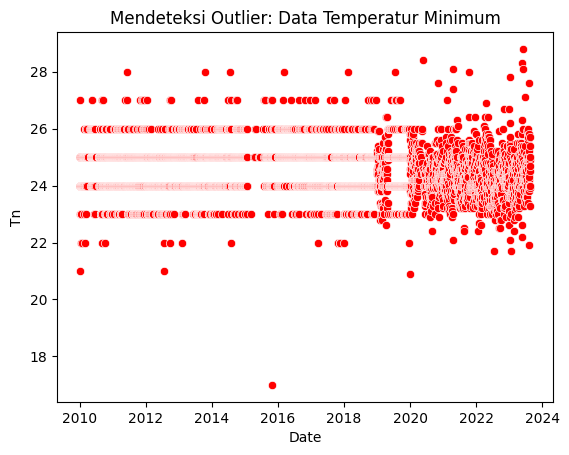

In [ ]:
# Menampilkan grafik temperatur minimum untuk mendeteksi outlier

sns.scatterplot(data=df2, x="Date", y="Tn", color="red")
plt.title('Mendeteksi Outlier: Data Temperatur Minimum')

In [ ]:
# Menghapus nilai outlier
df2['Tn'][df2['Tn'] < 18] = np.nan

<ipython-input-20-790e0206a1c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Tn'][df2['Tn'] < 18] = np.nan


Text(0.5, 1.0, 'Data Temperatur Minimum Setelah Outlier Dihapus')

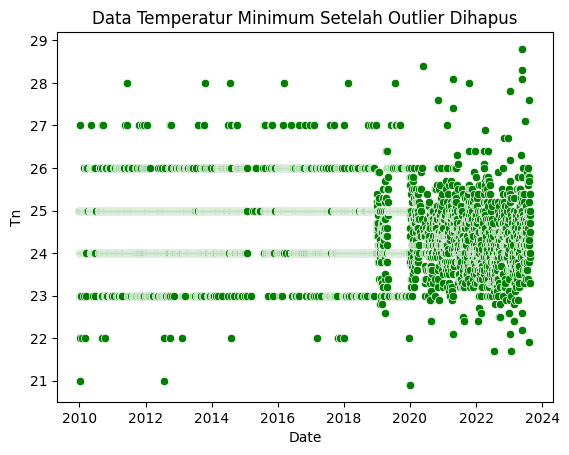

In [ ]:
# Menampilkan grafik temperatur minimum setelah menghapus outlier

sns.scatterplot(data=df2, x='Date', y="Tn", color="green")
plt.title('Data Temperatur Minimum Setelah Outlier Dihapus')

Text(0.5, 1.0, 'Mendeteksi Outlier: Data Temperatur Maksimum')

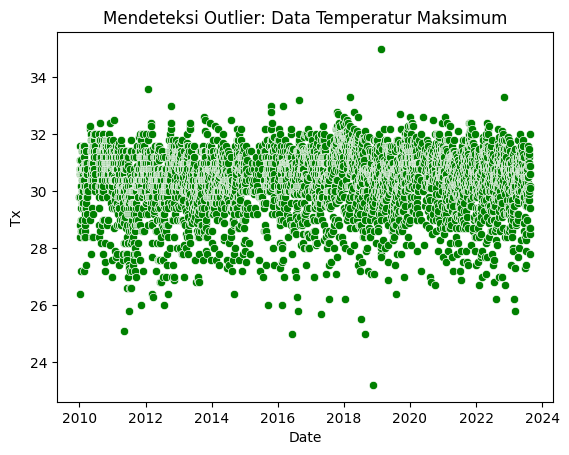

In [ ]:
# Menampilkan grafik temperatur maksimum untuk mendeteksi outlier

sns.scatterplot(data=df2, x="Date", y="Tx", color="green")
plt.title('Mendeteksi Outlier: Data Temperatur Maksimum')

Text(0.5, 1.0, 'Mendeteksi Outlier: Data Temperatur Rata-Rata')

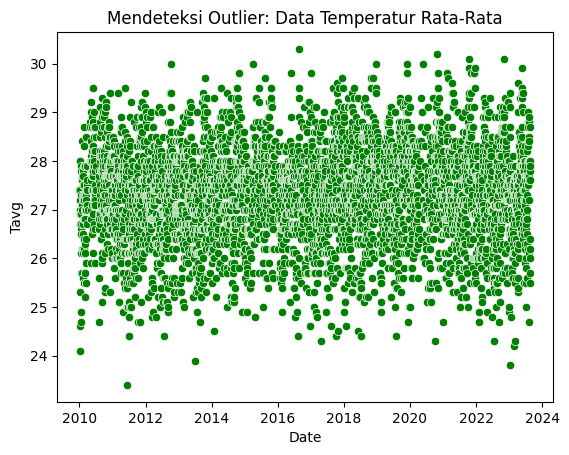

In [ ]:
# Menampilkan grafik temperatur rata-rata untuk mendeteksi outlier

sns.scatterplot(data=df2, x="Date", y="Tavg", color="green")
plt.title('Mendeteksi Outlier: Data Temperatur Rata-Rata')

Text(0.5, 1.0, 'Mendeteksi Outlier: Data Kelembapan Rata-Rata')

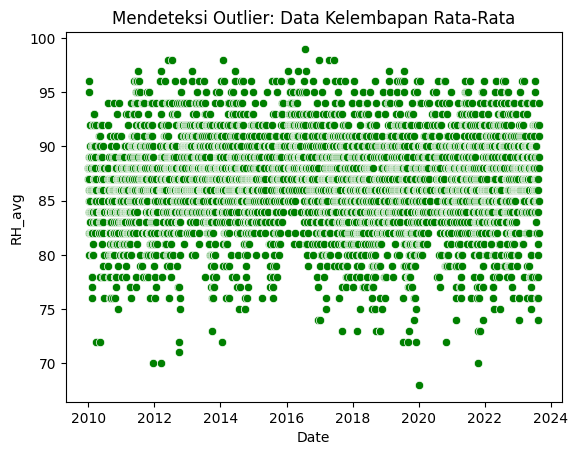

In [ ]:
# Menampilkan grafik kelembapan rata-rata untuk mendeteksi outlier

sns.scatterplot(data=df2, x="Date", y="RH_avg", color="green")
plt.title('Mendeteksi Outlier: Data Kelembapan Rata-Rata')

Text(0.5, 1.0, 'Mendeteksi Outlier: Data Curah Hujan')

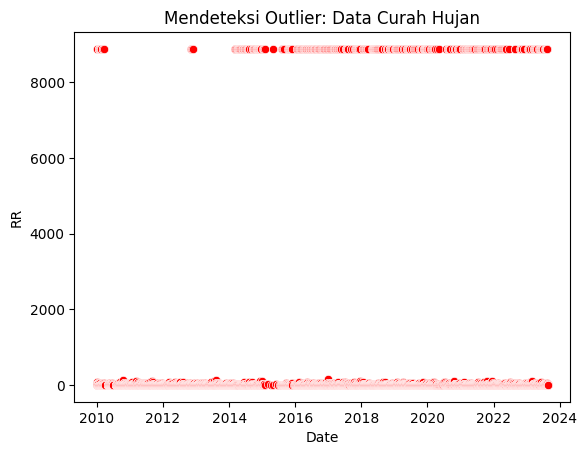

In [ ]:
# Menampilkan grafik curah hujan untuk mendeteksi outlier

sns.scatterplot(data=df2, x="Date", y="RR", color="red")
plt.title('Mendeteksi Outlier: Data Curah Hujan')

In [ ]:
# Menghapus nilai outlier
df2['RR'][df2['RR'] > 2000] = np.nan

<ipython-input-25-5580a7467b8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['RR'][df2['RR'] > 2000] = np.nan


Text(0.5, 1.0, 'Data Curah Hujan Setelah Outlier Dihapus')

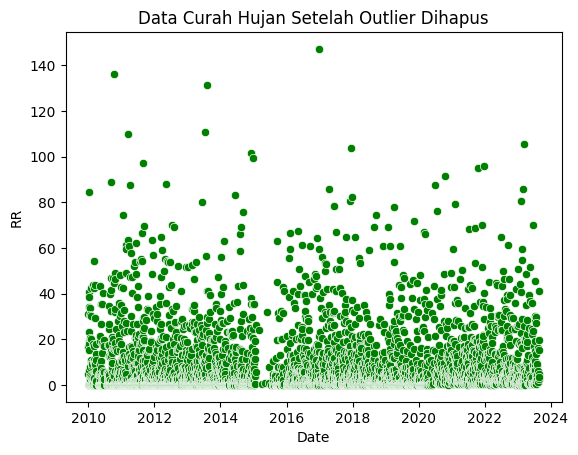

In [ ]:
# Menampilkan grafik curah hujan setelah menghapus outlier

sns.scatterplot(data=df2, x='Date', y="RR", color="green")
plt.title('Data Curah Hujan Setelah Outlier Dihapus')

Text(0.5, 1.0, 'Mendeteksi Outlier: Data Lamanya Penyinaran Matahari')

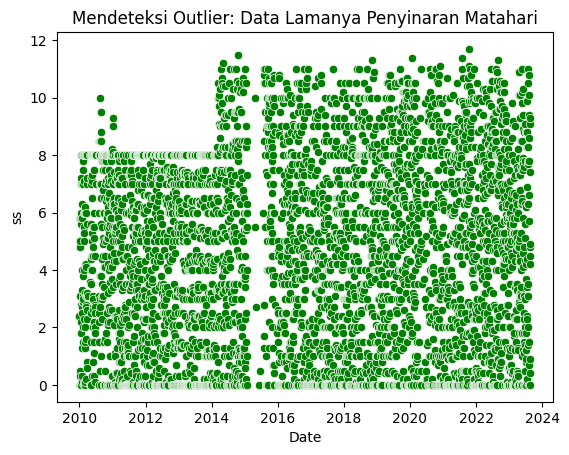

In [ ]:
# Menampilkan grafik lama penyinaran matahari untuk mendeteksi outlier

sns.scatterplot(data=df2, x="Date", y="ss", color="green")
plt.title('Mendeteksi Outlier: Data Lamanya Penyinaran Matahari')

Text(0.5, 1.0, 'Mendeteksi Outlier: Data Kecepatan Angin Maksimum')

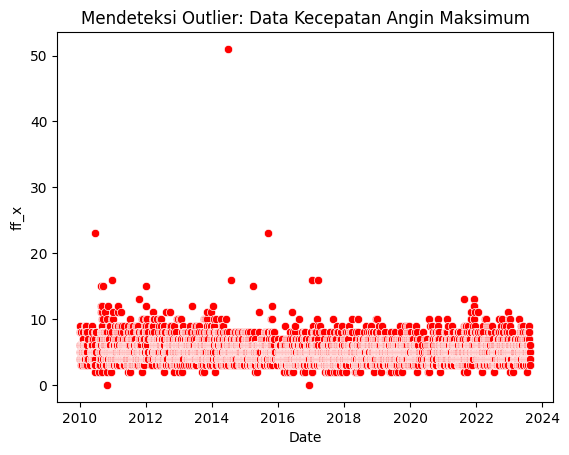

In [ ]:
# Menampilkan grafik kecepatan angin maksimum untuk mendeteksi outlier

sns.scatterplot(data=df2, x="Date", y="ff_x", color="red")
plt.title('Mendeteksi Outlier: Data Kecepatan Angin Maksimum')

In [ ]:
# Menghapus nilai outlier
df2['ff_x'][df2['ff_x'] > 30] = np.nan

<ipython-input-29-8cd4f6422bb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ff_x'][df2['ff_x'] > 30] = np.nan


Text(0.5, 1.0, 'Data Kecepatan Angin Maksimum Setelah Outlier Dihapus')

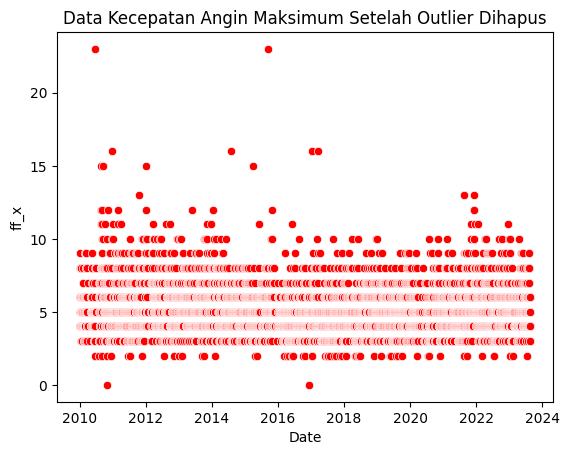

In [ ]:
# Menampilkan grafik kecepatan angin maksimum setelah menghapus outlier

sns.scatterplot(data=df2, x='Date', y="ff_x", color="red")
plt.title('Data Kecepatan Angin Maksimum Setelah Outlier Dihapus')

In [ ]:
# Menghapus nilai outlier
df2['ff_x'][df2['ff_x'] > 20] = np.nan

<ipython-input-31-34d417912d5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ff_x'][df2['ff_x'] > 20] = np.nan


Text(0.5, 1.0, 'Data Kecepatan Angin Maksimum Setelah Outlier Dihapus')

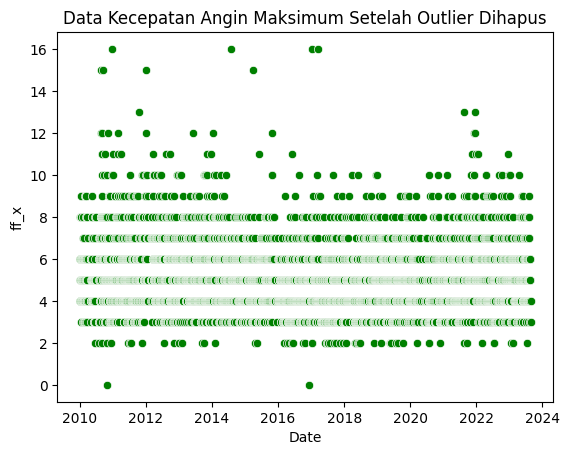

In [ ]:
# Menampilkan grafik kecepatan angin maksimum setelah menghapus outlier

sns.scatterplot(data=df2, x='Date', y="ff_x", color="green")
plt.title('Data Kecepatan Angin Maksimum Setelah Outlier Dihapus')

Text(0.5, 1.0, 'Mendeteksi Outlier: Data Arah Angin Saat Kecepatan Maksimum')

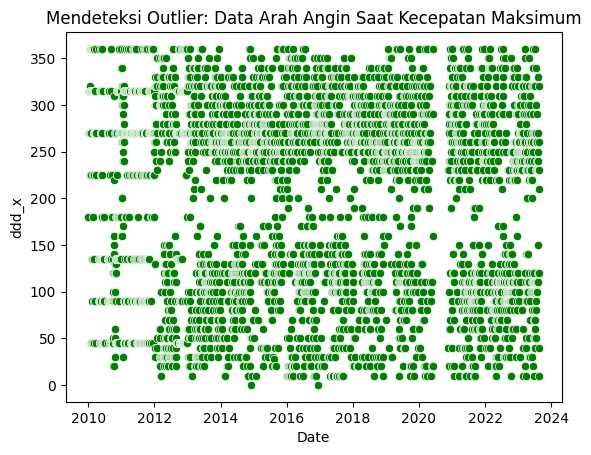

In [ ]:
# Menampilkan grafik arah angin saat kecepatan maksimum untuk mendeteksi outlier

sns.scatterplot(data=df2, x="Date", y="ddd_x", color="green")
plt.title('Mendeteksi Outlier: Data Arah Angin Saat Kecepatan Maksimum')

Text(0.5, 1.0, 'Mendeteksi Outlier: Data Kecepatan Angin Rata-Rata')

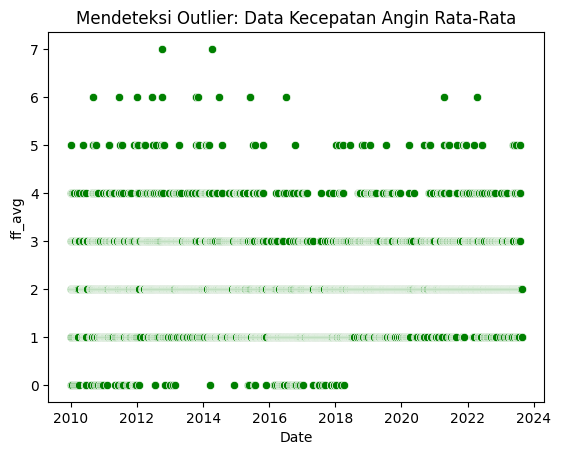

In [ ]:
# Menampilkan grafik kecepatan angin rata-rata untuk mendeteksi outlier

sns.scatterplot(data=df2, x="Date", y="ff_avg", color="green")
plt.title('Mendeteksi Outlier: Data Kecepatan Angin Rata-Rata')

In [ ]:
# Memeriksa missing values setelah menghapus outlier
df2.isna().sum()/n *100

Date       0.000000
Tn         9.216590
Tx         9.156482
RH_avg     8.495292
RR        22.600681
ss         9.997996
ff_x       4.708475
ddd_x      7.233019
dtype: float64

In [ ]:
# Mengisi missing values menggunakan fungsi ffill() dan bfill()
df_clean = df2.ffill()
df_clean = df_clean.bfill()

In [ ]:
# Memeriksa missing values setelah mengisi beberapa missing values
df_clean.isna().sum()/n *100

Date      0.0
Tn        0.0
Tx        0.0
RH_avg    0.0
RR        0.0
ss        0.0
ff_x      0.0
ddd_x     0.0
dtype: float64

In [ ]:
df_clean.describe()

,Tn,Tx,RH_avg,RR,ss,ff_x,ddd_x
count,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000
mean,24.556001,30.345562,86.606492,9.327069,4.568684,5.193148,195.412142
std,0.890441,1.122961,4.381715,14.778500,3.234610,1.708039,106.409292
min,20.900000,23.200000,68.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,29.800000,84.000000,0.300000,1.500000,4.000000,100.000000
50%,24.800000,30.500000,87.000000,3.300000,4.600000,5.000000,240.000000
75%,25.000000,31.200000,90.000000,11.650000,7.300000,6.000000,280.000000
max,28.800000,35.000000,99.000000,147.200000,11.700000,16.000000,360.000000


In [ ]:
# Menampilkan data setelah pre pemrosesan
df_clean.head()

,Date,Tn,Tx,RH_avg,RR,ss,ff_x,ddd_x
0,2010-01-01,25.0,29.8,88.0,16.6,2.4,4.0,180.0
1,2010-01-02,24.0,30.8,88.0,16.6,4.8,4.0,180.0
2,2010-01-03,25.0,31.1,88.0,30.9,5.8,4.0,315.0
3,2010-01-04,24.0,31.6,87.0,5.0,4.8,5.0,315.0
4,2010-01-05,21.0,30.8,87.0,0.3,5.8,4.0,315.0


In [ ]:
# Menyimpan data setelah pra pemrosesan data
df_clean.to_excel('Biak Numfor Clean.xlsx', index = False)